In [6]:
import matplotlib.pyplot as plt
import pandas

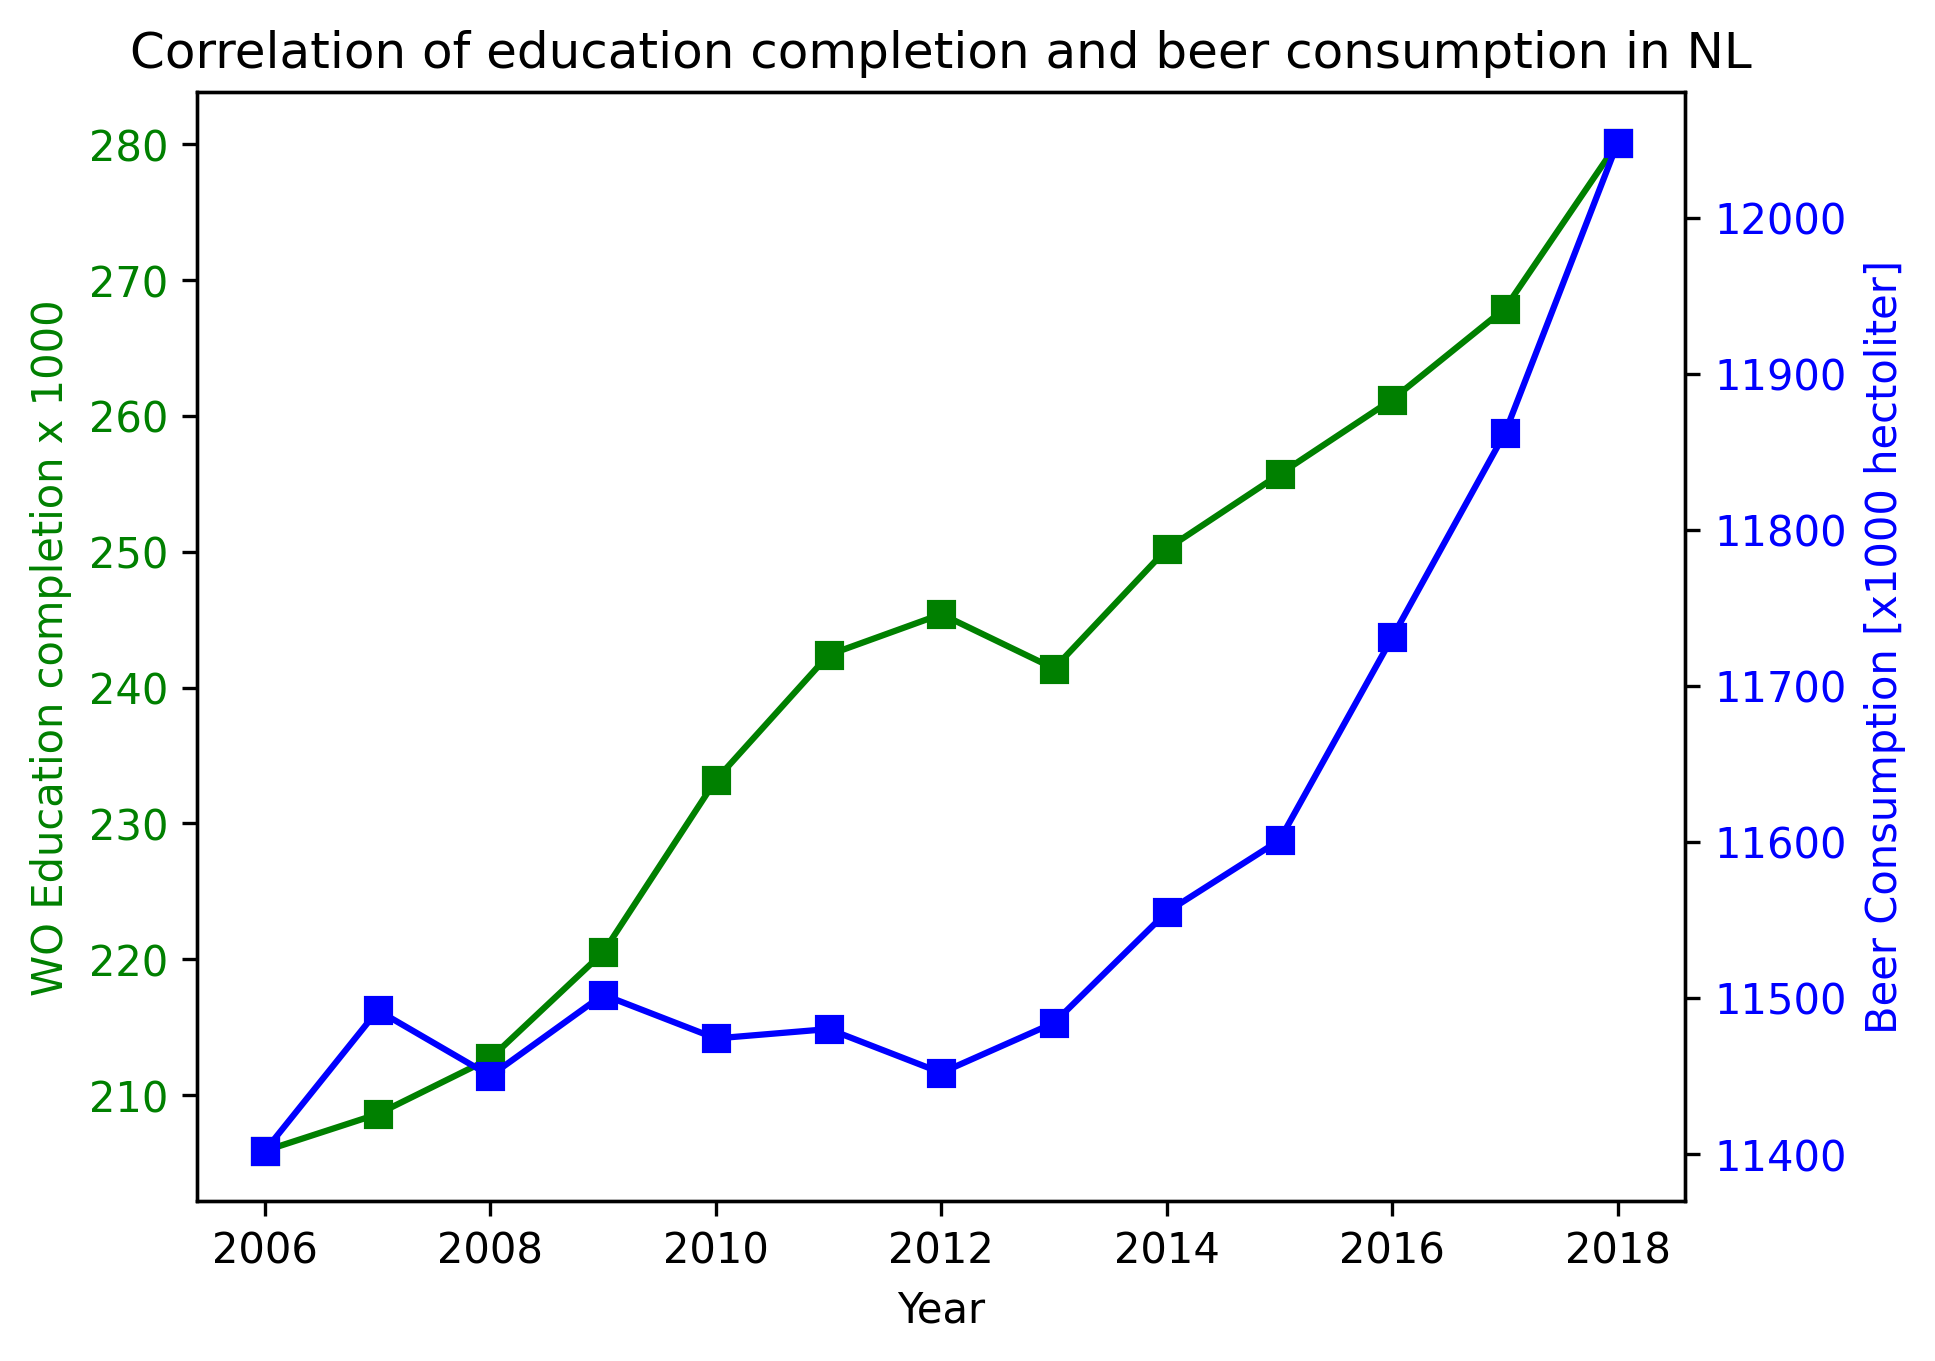

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
df = pd.read_csv('istherecorrelation.csv', sep=';')

# replace commas to dots and create floats
df['WO [x1000]'] = df['WO [x1000]'].str.replace(',', '.').astype(float)

# create lists from columns
years = df['Year'].tolist()
wo_count = df['WO [x1000]'].tolist()
beer_consumption = df['NL Beer consumption (x1000 hectoliter)'].tolist()

# create two plots
fig, ax1 = plt.subplots(dpi=300)


# plotting WO [x1000] on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('WO Education completion x 1000', color='green')
# plot line wo x1000
ax1.plot(df['Year'], df['WO [x1000]'], label='WO [x1000]', marker='s', color='g')
# parameters on left y axis green
ax1.tick_params(axis='y', labelcolor='g')

# plotting beer consumption on the right y axis
# creates a right y axis
ax2 = ax1.twinx()
ax2.set_ylabel('Beer Consumption [x1000 hectoliter]', color='blue')
# plot line beer consumption
ax2.plot(df['Year'], df['NL Beer consumption [x1000 hectoliter]'], label='Beer Consumption in NL', marker='s', color='b')
# parameters on right y axis blue
ax2.tick_params(axis='y', labelcolor='b')

# Adding the title
plt.title('Correlation of education completion and beer consumption in NL')


# SAVE
plt.savefig('istherecorrelation.png', dpi=300)








